В папке clustering лежат данные CC_GENERAL и тетрадка HW.ipynb
В тетрадке есть функции раскидывающие данные по бинам, их трогать не надо, 
но изучите внимательно что они делают. Ваша задача запустить StandartScaler и 
стандартизировать данные. Можете очистить от выбросов, можете этого не делать, 
на ваше усмотрение. Дальше попробуйте алгоритм k-means используя метод локтя и силуэта, 
чтобы определить оптимальное количество кластеров, отдельно используйте DBSCAN. 
Понизьте размерность с помощью PCA и визуализируйте.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("cc_general.csv")
median_min_payment = 3000
median_credit_limit = 312.
data.fillna({'CREDIT_LIMIT': median_credit_limit, 'MINIMUM_PAYMENTS': median_min_payment}, inplace=True)

In [3]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

In [4]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [5]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [6]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = StandardScaler().fit_transform(X)
X

array([[ 0.36067954, -0.97851102, -0.43862278, ..., -0.54119881,
        -0.64681226, -0.69462206],
       [ 0.36067954,  1.29798329, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [ 0.36067954,  0.53915185,  0.30290987, ..., -0.54119881,
         0.25898804, -0.69462206],
       ...,
       [-4.12276757, -0.97851102, -0.43862278, ...,  0.45299851,
        -0.64681226, -0.69462206],
       [-4.12276757, -0.97851102, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [-4.12276757, -0.97851102,  1.04444252, ..., -0.54119881,
         1.16478834,  0.12597818]])

In [8]:
from sklearn.cluster import DBSCAN

In [38]:
from itertools import product

eps_values = np.arange(1,5,1) # eps values to be investigated
min_samples = np.arange(10,100,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [39]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X) 
    if len(np.unique(DBS_clustering.labels_)) == 1:
        print(p[0], p[1])
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))
print(len(no_of_clusters))    

36


In [11]:
print(no_of_clusters) 

[184, 89, 61, 45, 40, 29, 25, 10, 5, 4, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [12]:
print(sil_score)

[-0.387267419739005, -0.37755795921992646, -0.37282158624184314, -0.3616514791399486, -0.36858517151663084, -0.3346581741152888, -0.31799780156138574, -0.05963196329803107, 0.0440542591997411, 0.10079697040502825, 0.17573845470706323, 0.17302415015893588, 0.16911787318280577, 0.19931854934301677, 0.28305743174202047, 0.33138740817579543, 0.33489626431968766, 0.33688285239695076, 0.33775012748671507, 0.33234090766822794, 0.3357046309019997, 0.43883208958449627, 0.43883208958449627, 0.43883208958449627, 0.43883208958449627, 0.43883208958449627, 0.43883208958449627, 0.43883208958449627]


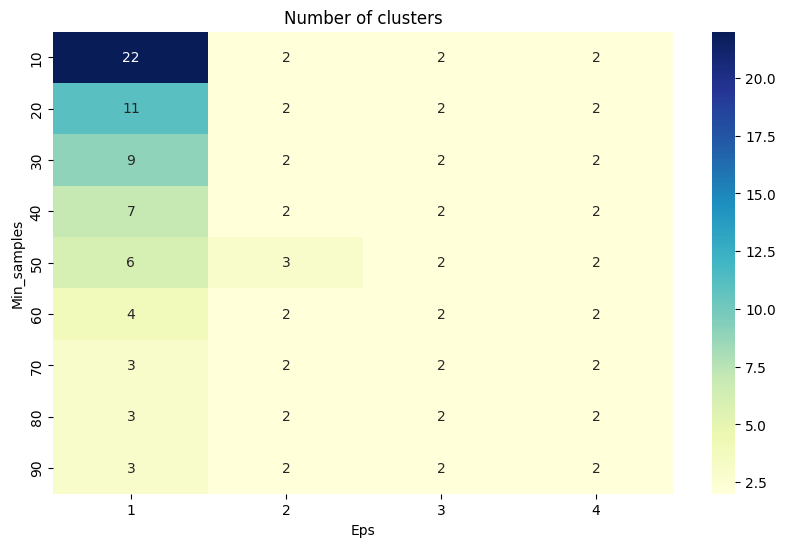

In [40]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

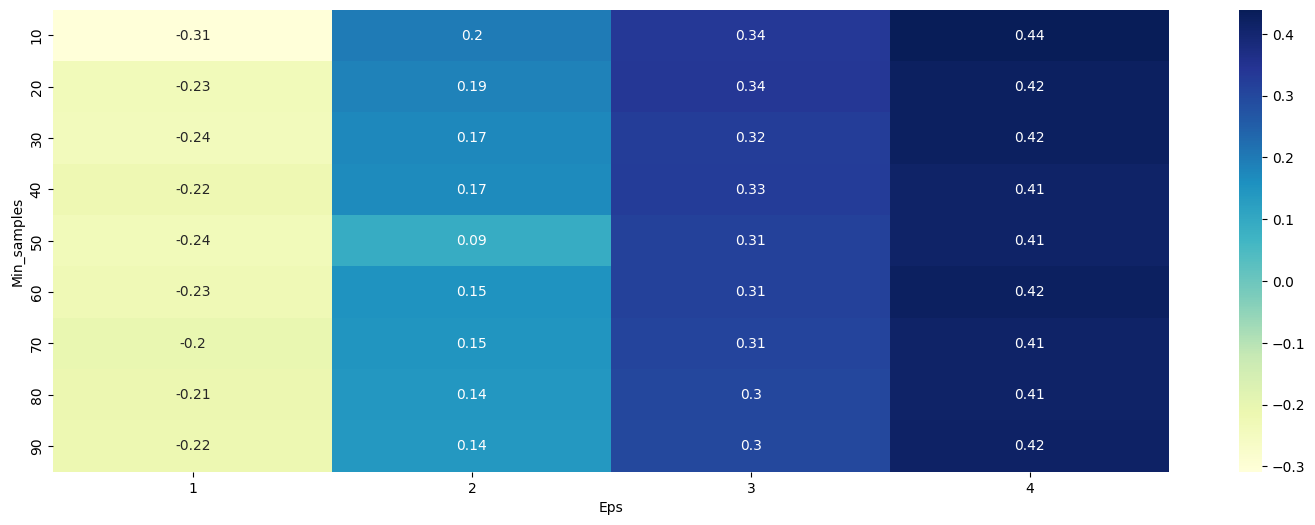

In [41]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Максимум при eps=4, кол-во кластеров 2

In [46]:
DBS_clustering = DBSCAN(eps=2, min_samples=60).fit(X)



In [47]:
DBSCAN_clustered = data.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [48]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2139
0,6811


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

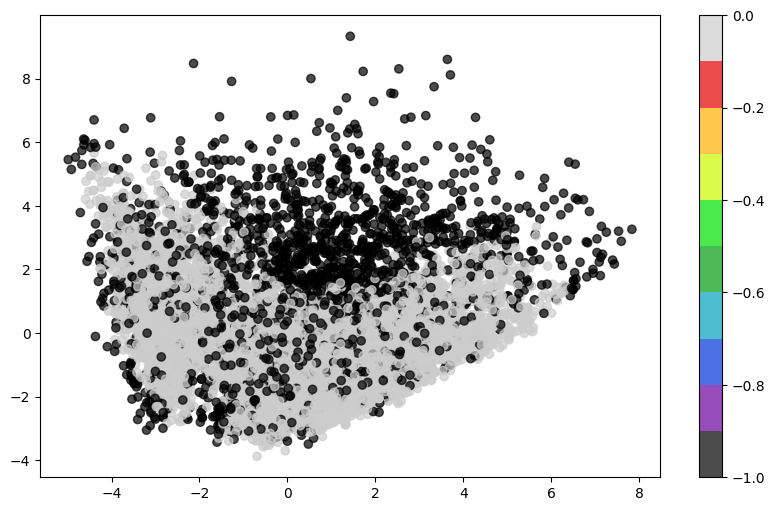

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c = DBS_clustering.labels_, alpha=0.7,
                cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()